<a href="https://colab.research.google.com/github/sherry-tang-97/H-M_recommender/blob/main/H%26M_Visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


In [ ]:
from pandas.core.common import random_state
from google.colab import drive
drive.mount("/content/drive")
transaction = pd.read_csv("/content/drive/MyDrive/hm_data/transactions_train.csv")
transaction=transaction.sample(frac=0.35, random_state=2147243475)
articles = pd.read_csv("/content/drive/MyDrive/hm_data/articles.csv")
customers = pd.read_csv("/content/drive/MyDrive/hm_data/customers.csv")

Mounted at /content/drive


In [ ]:
transaction.shape

(11125913, 5)

In [ ]:
transaction=transaction.sort_values(by=['t_dat'])
transaction['t_dat']=pd.to_datetime(transaction['t_dat'], infer_datetime_format=True)
tplusc=pd.merge(transaction, customers, on="customer_id", how="left")
tplusa=pd.merge(transaction, articles, on="article_id", how="left")

overall trend, sales, traffic, and purchasing power

In [ ]:
#sales
transaction_by_month=transaction.groupby([transaction.t_dat.dt.year, transaction.t_dat.dt.month])
monthly_sales=transaction_by_month.size()

In [ ]:
monthly_sales_df=monthly_sales.to_frame()
monthly_sales_df.columns=['Sales']

In [ ]:
fig, ax = plt.subplots()

monthly_sales_df.plot.line(y='Sales', ax=ax)

ax.set_title('Monthly Total Sales Over 2 years')
ax.set_xlabel('Date')
ax.set_ylabel('Sales (Thousand)')

yticks=np.arange(200000,700000,100000).tolist()
yticklabels=['200K', '300K', '400K', '500K', '600K']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

ax.grid()

In [ ]:
#traffic
monthly_traffic=[]
for name, group in transaction_by_month:
    monthly_traffic.append(len(transaction_by_month.get_group(name).article_id.unique()))

monthly_sales_df['Traffic']=monthly_traffic

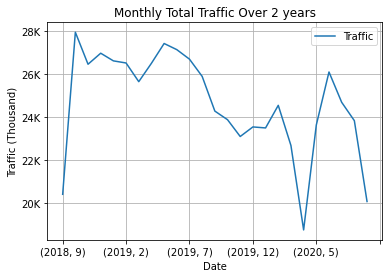

In [ ]:
fig, ax = plt.subplots()

monthly_sales_df.plot.line(y='Traffic', ax=ax)

ax.set_title('Monthly Total Traffic Over 2 years')
ax.set_xlabel('Date')
ax.set_ylabel('Traffic (Thousand)')

yticks=np.arange(20000,30000,2000).tolist()
yticklabels=['20K', '22K', '24K', '26K', '28K']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

ax.grid()

In [ ]:
#Purchasing Power
monthly_sales_df['Power']=monthly_sales_df['Sales']/monthly_sales_df['Traffic']
monthly_sales_df.Power=monthly_sales_df.Power.round()

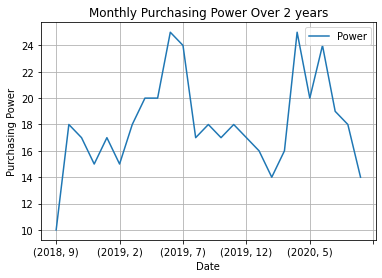

In [ ]:
fig, ax = plt.subplots()

monthly_sales_df.plot.line(y='Power', ax=ax)

ax.set_title('Monthly Purchasing Power Over 2 years')
ax.set_xlabel('Date')
ax.set_ylabel('Purchasing Power')


ax.grid()

**online vs In-Store**

In [ ]:
store=tplusc.loc[tplusc['sales_channel_id']==1]
online=tplusc.loc[tplusc['sales_channel_id']==2]
store_by_month=store.groupby([store.t_dat.dt.year, store.t_dat.dt.month])
online_by_month=online.groupby([online.t_dat.dt.year, online.t_dat.dt.month])

In [ ]:
#sales 
df_store_vs_online=store_by_month.size().to_frame()
df_store_vs_online.columns=['store_sales']
df_store_vs_online['online_sales']=online_by_month.size()

In [ ]:
fig, ax = plt.subplots()

df_store_vs_online.plot.line(ax=ax)

ax.set_title('Online vs In-Store Sales Over 2 years')
ax.set_xlabel('Date')
ax.set_ylabel('Sales (Thousand)')

yticks=np.arange(100000,500000,100000).tolist()
yticklabels=['100K', '200K', '300K', '400K']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

ax.grid()

In [ ]:
#traffic
store_traffic=[]
for name, group in store_by_month:
    store_traffic.append(len(store_by_month.get_group(name).article_id.unique()))

online_traffic=[]
for name, group in store_by_month:
    online_traffic.append(len(online_by_month.get_group(name).article_id.unique()))

In [ ]:
df_store_vs_online['store_traffic']=store_traffic
df_store_vs_online['online_traffic']=online_traffic

In [ ]:
del store, online

In [ ]:
fig, ax = plt.subplots()

df_store_vs_online.plot.line(y=['store_traffic','online_traffic'],ax=ax)

ax.set_title('Online vs In-Store Traffic Over 2 years')
ax.set_xlabel('Date')
ax.set_ylabel('Traffic (Thousand)')

ax.set_yticks(np.arange(10000,26000,2000).tolist())
ax.set_yticklabels(['10K', '12K', '14K', '16K', '18K', '20K', '22K', '24K'])

ax.grid()

In [ ]:
#purchasing power
df_store_vs_online['store_power']=df_store_vs_online.store_sales/df_store_vs_online.store_traffic
df_store_vs_online['online_power']=df_store_vs_online.online_sales/df_store_vs_online.online_traffic


In [ ]:
fig, ax = plt.subplots()

df_store_vs_online.plot.line(y=['store_power','online_power'],ax=ax)

ax.set_title('Online vs In-Store Purchasing Power Over 2 years')
ax.set_xlabel('Date')
ax.set_ylabel('Purchasing Power')

ax.grid()

teen young mature

In [ ]:
young=tplusc.loc[(tplusc['age'] >= 16) & (tplusc['age'] <= 30)]
mature=tplusc.loc[(tplusc['age'] > 30) & (tplusc['age'] <= 50)]
elder=tplusc.loc[(tplusc['age'] > 50) & (tplusc['age'] <= 99)]

In [ ]:
young_by_month=young.groupby([young.t_dat.dt.year, young.t_dat.dt.month])
mature_by_month=mature.groupby([mature.t_dat.dt.year, mature.t_dat.dt.month])
elder_by_month=elder.groupby([elder.t_dat.dt.year, elder.t_dat.dt.month])

In [ ]:
df_traffic=young_by_month.size().to_frame()
df_traffic.columns=['young_sales']
df_traffic['mature_sales']=mature_by_month.size()
df_traffic['elder_sales']=elder_by_month.size()


In [ ]:
def calc_traffic(by_month):
  traffic=[]
  for name, group in by_month:
    traffic.append(len(by_month.get_group(name).article_id.unique()))
  return traffic


In [ ]:
young_traffic=calc_traffic(young_by_month)
mature_traffic=calc_traffic(mature_by_month)
elder_traffic=calc_traffic(elder_by_month)

df_traffic['young_traffic']=young_traffic
df_traffic['mature_traffic']=mature_traffic
df_traffic['elder_traffic']=elder_traffic

In [ ]:
y=df_traffic.sum().young_traffic
m=df_traffic.sum().mature_traffic
e=df_traffic.sum().elder_traffic

s=y+m+e

pie_age=[y/s, m/s, e/s]
labels=['young', 'mature', 'elder']

Text(0.5, 1.0, 'Total Traffic by Age Group')

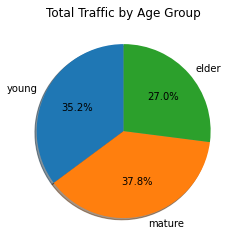

In [ ]:
fig, ax = plt.subplots()
ax.pie(pie_age, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Total Traffic by Age Group')

In [ ]:
del young, mature, elder, young_by_month, mature_by_month, elder_by_month, young_traffic, mature_traffic, elder_traffic

In [ ]:
fig, ax = plt.subplots()
df_traffic.plot.line(y=['young_traffic','mature_traffic', 'elder_traffic'],ax=ax)

ax.set_title('Traffic Amoung Age Groups')
ax.set_xlabel('Date')
ax.set_ylabel('Traffic (Thousand)')

ax.set_yticks(np.arange(10000,24000,2000).tolist())
ax.set_yticklabels(['10K', '12K', '14K', '16K', '18K', '20K', '22K'])

ax.grid()

active or not

In [ ]:
active=tplusc.loc[tplusc.Active==1]
inactive=tplusc.loc[tplusc.Active.isna()]

In [ ]:
active_by_month=active.groupby([active.t_dat.dt.year, active.t_dat.dt.month])
inactive_by_month=inactive.groupby([inactive.t_dat.dt.year, inactive.t_dat.dt.month])

In [ ]:
active_traffic=calc_traffic(active_by_month)
inactive_traffic=calc_traffic(inactive_by_month)


df_traffic['active_traffic']=active_traffic
df_traffic['inactive_traffic']=inactive_traffic

In [ ]:
del active, inactive, active_by_month, inactive_by_month

In [ ]:
a=df_traffic.sum().active_traffic
i=df_traffic.sum().inactive_traffic

s= a+i

pie_active=[a/s, i/s]
labels=['Active', 'Inactive']

Text(0.5, 1.0, 'Total Traffic by Activeness')

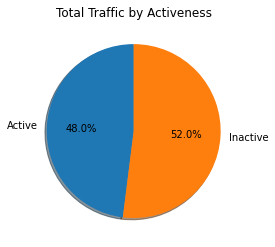

In [ ]:
fig, ax = plt.subplots()
ax.pie(pie_active, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Total Traffic by Activeness')

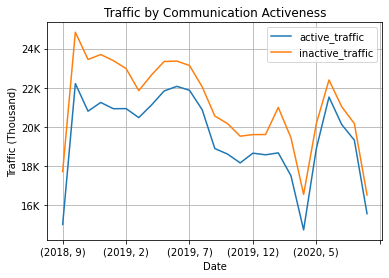

In [ ]:
fig, ax = plt.subplots()
df_traffic.plot.line(y=['active_traffic', 'inactive_traffic'],ax=ax)

ax.set_title('Traffic by Communication Activeness')
ax.set_xlabel('Date')
ax.set_ylabel('Traffic (Thousand)')

ax.set_yticks(np.arange(16000,26000,2000).tolist())
ax.set_yticklabels(['16K', '18K', '20K', '22K', '24K'])

ax.grid()

In [ ]:
yep=tplusc.loc[tplusc.FN==1]
nope=tplusc.loc[tplusc.FN.isna()]

yep_by_month=yep.groupby([yep.t_dat.dt.year, yep.t_dat.dt.month])
nope_by_month=nope.groupby([nope.t_dat.dt.year, nope.t_dat.dt.month])


yep_traffic=calc_traffic(yep_by_month)
nope_traffic=calc_traffic(nope_by_month)


d={'active_traffic': yep_traffic, 
   'inactive_traffic': nope_traffic}

df=pd.DataFrame(data=d)

In [ ]:
del yep, nope, yep_by_month, nope_by_month

In [ ]:
fig, ax = plt.subplots()
df.plot.line(ax=ax)

ax.set_title('Online vs In-Store Purchasing Power Over 2 years')
ax.set_xlabel('Date')
ax.set_ylabel('Purchasing Power')

ax.grid()

women vs men

In [ ]:
tplusa.index_group_name.value_counts()

In [ ]:
women=tplusa.loc[tplusa.index_group_name=='Ladieswear']
men=tplusa.loc[tplusa.index_group_name=='Menswear']
div=tplusa.loc[tplusa.index_group_name=='Divided']

women_by_month=women.groupby([women.t_dat.dt.year, women.t_dat.dt.month])
men_by_month=men.groupby([men.t_dat.dt.year, men.t_dat.dt.month])
div_by_month=div.groupby([div.t_dat.dt.year, div.t_dat.dt.month])

women_traffic=calc_traffic(women_by_month)
men_traffic=calc_traffic(men_by_month)
div_traffic=calc_traffic(div_by_month)

df_traffic['women_traffic']=women_traffic
df_traffic['men_traffic']=men_traffic
df_traffic['div_traffic']=div_traffic

In [ ]:
del women, men, div, women_by_month, men_by_month, div_by_month, women_traffic, men_traffic, div_traffic

In [ ]:
w=df_traffic.sum().women_traffic
m=df_traffic.sum().men_traffic
d=df_traffic.sum().div_traffic

s=w+m+d

pie_gender=[w/s, m/s, d/s]
labels=['Women', 'Men', 'Divided']


Text(0.5, 1.0, 'Total Traffic by Gender')

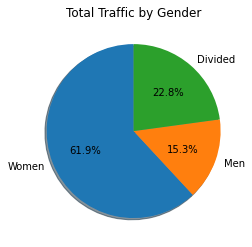

In [ ]:
fig, ax = plt.subplots()
ax.pie(pie_gender, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Total Traffic by Gender')

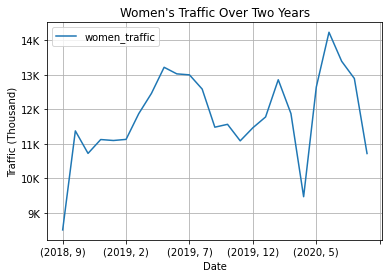

In [ ]:
fig, ax = plt.subplots()
df_traffic.plot.line(y=['women_traffic'],ax=ax)

ax.set_title("Women's Traffic Over Two Years")
ax.set_xlabel('Date')
ax.set_ylabel('Traffic (Thousand)')

ax.set_yticks(np.arange(9000,15000,1000).tolist())
ax.set_yticklabels(['9K', '10K', '11K', '12K', '13K', '14K'])

ax.grid()


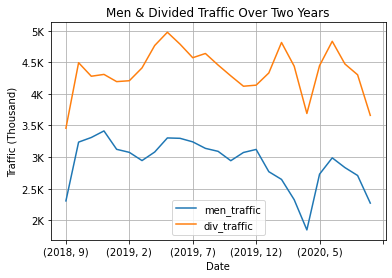

In [ ]:
fig, ax = plt.subplots()
df_traffic.plot.line(y=['men_traffic', 'div_traffic'],ax=ax)

ax.set_title('Men & Divided Traffic Over Two Years')
ax.set_xlabel('Date')
ax.set_ylabel('Traffic (Thousand)')

ax.set_yticks(np.arange(2000,5500,500).tolist())
ax.set_yticklabels(['2K', '2.5K', '3K', '3.5K', '4K', '4.5K', '5K'])

ax.grid()

What are some features that boost purchasing power

In [ ]:
by_customer=tplusc.groupby(['customer_id'])

In [ ]:
indi_pur=by_customer.size()
index = indi_pur.index.tolist()
value = indi_pur.values.tolist()
d={'customer_id': index, 'total_purchases': value}
indi_pur_df=pd.DataFrame(data=d)
indi_pur_df['customer_id']=indi_pur_df['customer_id'].astype(str)
df_micro_c=pd.merge(indi_pur_df, customers, on="customer_id", how="left")


del by_customer, indi_pur, index, value, d, indi_pur_df

In [ ]:
df_micro_c['logged_purchases']=np.log(df_micro_c.total_purchases)

In [ ]:
df_micro_c.FN=df_micro_c.FN.fillna(value=0)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


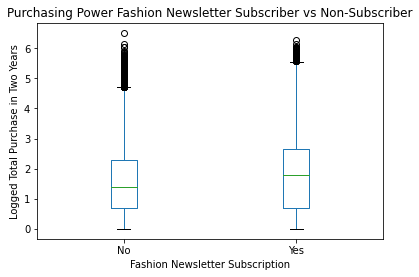

In [ ]:
fig, ax=plt.subplots()
df_micro_c.boxplot(column='logged_purchases', by='FN', ax=ax)

plt.suptitle('')
ax.set_title("Purchasing Power Fashion Newsletter Subscriber vs Non-Subscriber")
ax.set_xlabel('Fashion Newsletter Subscription')
ax.set_ylabel('Logged Total Purchase in Two Years')
ax.set_xticklabels(['No', 'Yes'])
ax.grid()

In [ ]:
df_micro_c.Active=df_micro_c.Active.fillna(value=0)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


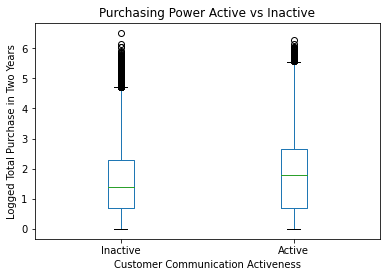

In [ ]:
fig, ax=plt.subplots()
df_micro_c.boxplot(column='logged_purchases', by='Active', ax=ax)

plt.suptitle('')
ax.set_title("Purchasing Power Active vs Inactive")
ax.set_xlabel('Customer Communication Activeness')
ax.set_ylabel('Logged Total Purchase in Two Years')
ax.set_xticklabels(['Inactive', 'Active'])
ax.grid()

In [ ]:
df_micro_c.club_member_status=df_micro_c.club_member_status.fillna(value='INACTIVE')

In [ ]:
df_micro_c.boxplot(column='logged_purchases', by='club_member_status')

In [ ]:
by_article=tplusa.groupby(['article_id'])

indi_sales=by_article.size()
index = indi_sales.index.tolist()
value = indi_sales.values.tolist()
d={'article_id': index, 'total_sales': value}
indi_sales_df=pd.DataFrame(data=d)
df_micro_a=pd.merge(indi_sales_df, articles, on="article_id", how="left")

del by_article, indi_sales, index, value, indi_sales_df

In [ ]:
df_micro_a['logged_sales']=np.log(df_micro_a.total_sales)

In [ ]:
options = ['Ladieswear', 'Divided', 'Menswear'] 
df_micro_a=df_micro_a[df_micro_a['index_group_name'].isin(options)] 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


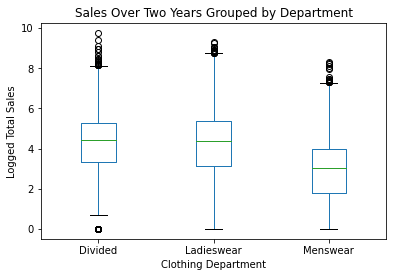

In [ ]:
fig, ax=plt.subplots()
df_micro_a.boxplot(column='logged_sales', by='index_group_name', ax=ax)

plt.suptitle('')
ax.set_title("Sales Over Two Years Grouped by Department")
ax.set_xlabel('Clothing Department')
ax.set_ylabel('Logged Total Sales')
ax.grid()
